In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import warnings
from Bio import SeqIO,BiopythonParserWarning

How many proteins of the in silico matrisome were detected?

In [2]:
warnings.simplefilter('ignore', BiopythonParserWarning)
seqs = list(SeqIO.parse(r"output\Sequences\Nematostella_vectensis\Nematostella_vectensis_matrisome.gb","gb"))
raw_in_silico_IDs = set([seq.id.replace("Nematostella_vectensis_","") for seq in seqs])

in_silico_matrisome = pd.read_excel(r"Candidate Liste.xlsx", index_col=0)
limma_results = pd.read_csv(r"GideonBergheim_P1482_newDB_V3\data_analysis_results_V3\Limma_results_V3.csv",index_col=0)
print(len(limma_results.index)/3)

# Unpack and split the elements, including sublists, without splitting into individual letters
limma_IDs = [item.split('|') if '|' in item else [item] for item in limma_results.index]

# Flatten the list of lists
limma_IDs = set([subitem for sublist in limma_IDs for subitem in sublist])

curated_in_silico_IDs = set(i.replace("Nematostella_vectensis_","") for i in in_silico_matrisome.index)
no_other = set(i for i in in_silico_matrisome.loc[in_silico_matrisome['Division manual'] != "Other"].index)

5079.666666666667


In [3]:
def check_hit(group):
    if 'hit' in group.values:
        return True
    else:
        return False

# Apply the function to each group and create a new series
new_series = limma_results.groupby(limma_results.index)['hit_annotation'].apply(check_hit)
# Create an empty dictionary to store the expanded series
expanded_dict = {}

# Iterate through the series and expand the indices
for indices, value in new_series.items():
    for index in indices.split('|'):
        expanded_dict[index] = value

# Convert the dictionary back to a series
hit_list = pd.Series(expanded_dict)
hit_list

NV2t000010001.1     True
NV2t000012001.1    False
NV2t000013001.1    False
NV2t000017002.1    False
NV2t000019001.1    False
                   ...  
NV2t023938002.1    False
NV2t023939001.1    False
NV2t023952001.1    False
NV2t023953001.1    False
NV2t023959001.1     True
Length: 6918, dtype: bool

In [4]:
cu_no_other = []
for seq in seqs:
    if seq.id in no_other:
        cu_no_other.append(seq)

In [5]:
len(cu_no_other)

550

In [6]:
SeqIO.write(cu_no_other,"published_input\Cnidaria_Anthozoa_Nematostella_vectensis.fasta","fasta")

550

In [7]:
# Find the shared elements
shared_raw_curated = raw_in_silico_IDs & curated_in_silico_IDs
shared_raw_limma = raw_in_silico_IDs & limma_IDs
shared_curated_limma = curated_in_silico_IDs & limma_IDs

# Find the size of the shared elements
size_shared_raw_curated = len(shared_raw_curated)
size_shared_raw_limma = len(shared_raw_limma)
size_shared_curated_limma = len(shared_curated_limma)

print(f"Shared elements between raw_in_silico_IDs and curated_in_silico_IDs: {size_shared_raw_curated}")
print(f"Shared elements between raw_in_silico_IDs and limma_IDs: {size_shared_raw_limma}")
print(f"Shared elements between curated_in_silico_IDs and limma_IDs: {size_shared_curated_limma}")

Shared elements between raw_in_silico_IDs and curated_in_silico_IDs: 828
Shared elements between raw_in_silico_IDs and limma_IDs: 491
Shared elements between curated_in_silico_IDs and limma_IDs: 287


how many of the matrisome proteins are hits or candidates?

In [8]:

shared_annotation_count = limma_results.loc[limma_results.index.str.contains("|".join(list(shared_curated_limma)))][["comparison","hit_annotation"]]

shared_annotation_count
unique_combinations = shared_annotation_count.groupby(['comparison', 'hit_annotation']).size().reset_index(name='Count')
unique_combinations

,comparison,hit_annotation,Count
0,(Larvae - Adult) - (PrimaryPolyp - Adult),candidate,59
1,(Larvae - Adult) - (PrimaryPolyp - Adult),hit,98
2,(Larvae - Adult) - (PrimaryPolyp - Adult),no hit,130
3,Larvae - Adult,candidate,56
4,Larvae - Adult,hit,143
5,Larvae - Adult,no hit,88
6,PrimaryPolyp - Adult,candidate,41
7,PrimaryPolyp - Adult,hit,156
8,PrimaryPolyp - Adult,no hit,90


In [9]:
shared_annotation_count = limma_results.loc[limma_results.index.str.contains("|".join(list(shared_raw_limma)))][["comparison","hit_annotation"]]

shared_annotation_count
unique_combinations = shared_annotation_count.groupby(['comparison', 'hit_annotation']).size().reset_index(name='Count')
unique_combinations

,comparison,hit_annotation,Count
0,(Larvae - Adult) - (PrimaryPolyp - Adult),candidate,76
1,(Larvae - Adult) - (PrimaryPolyp - Adult),hit,110
2,(Larvae - Adult) - (PrimaryPolyp - Adult),no hit,192
3,Larvae - Adult,candidate,69
4,Larvae - Adult,hit,193
5,Larvae - Adult,no hit,116
6,PrimaryPolyp - Adult,candidate,63
7,PrimaryPolyp - Adult,hit,195
8,PrimaryPolyp - Adult,no hit,121


In [10]:
clusters = pd.read_csv(r"GideonBergheim_P1482_newDB_V3\data_analysis_results_V3\Cluster_results_data14cluster_3751_proteins_V3.csv",index_col=0)
clusters.head()

,condition,median.value,kmeans.cluster.group,hclust.cluster.group
gene_name,,,,
NV2t000010001.1,Larvae,0.918088,4,1
NV2t000010001.1,PrimaryPolyp,1.479797,4,1
NV2t000010001.1,Adult,0.377471,4,1
NV2t000013001.1,Larvae,0.741829,6,2
NV2t000013001.1,PrimaryPolyp,1.425145,6,2


In [11]:
candidate_list = pd.read_excel(r"Candidate Liste.xlsx",index_col=0)
candidate_list = candidate_list.loc[candidate_list.experimental == 1]
candidate_list.index = candidate_list.index.str.replace("Nematostella_vectensis_","")
cand=candidate_list[['Division manual','Category manual']]
cand.head()

,Division manual,Category manual
ProteinID,,
NV2t006771001.1,Matrisome associated,ECM regulators
NV2t013893002.1,Matrisome associated,ECM regulators
NV2t018385002.1,Matrisome associated,ECM regulators
NV2t022459002.1,Matrisome associated,ECM regulators
NV2t021636001.1,Matrisome associated,ECM regulators


In [12]:
candidate_list.columns

Index(['gene_id', 'Sorted number', 'experimental', 'hirarchical_orthogroup',
       'exclusion reason', 'isoform_ref', 'shRNA_candidate',
       'new_manual_annotation', 'SignalP prediction', 'SignalP_ location',
       'Swissprot_gene_description', 'closest_NCBI',
       'closest_NCBI_description', 'short_Name',
       'predicted Division \n(Naba et al domain based',
       'predicted Category \nNaba et al. domain-based', 'Literature',
       'Division manual', 'Category manual',
       'SignalP - Signal peptide prediction', 'DeepLoc- location',
       'DeepLoc - signals', 'Location manual', 'Biological Process|Function',
       'Cnidaria-specific', 'Protein Class', 'Protein Subclass',
       'Techau Cnidocyst genes', 'Swissprot', 'NCBI ID', 'NCBI description'],
      dtype='object')

In [13]:
clusters.index = clusters.index.str.split("|")
clusters=clusters.reset_index().explode("gene_name").set_index("gene_name")
clusters.head()

,condition,median.value,kmeans.cluster.group,hclust.cluster.group
gene_name,,,,
NV2t000010001.1,Larvae,0.918088,4,1
NV2t000010001.1,PrimaryPolyp,1.479797,4,1
NV2t000010001.1,Adult,0.377471,4,1
NV2t000013001.1,Larvae,0.741829,6,2
NV2t000013001.1,PrimaryPolyp,1.425145,6,2


In [14]:
 clusters = clusters[["median.value","condition"]].pivot(columns = "condition")
 clusters.head()

median.value                       
condition              Adult    Larvae PrimaryPolyp
gene_name                                          
NV2t000010001.1     0.377471  0.918088     1.479797
NV2t000013001.1     0.765507  0.741829     1.425145
NV2t000017002.1     0.914785  1.208016     0.793467
NV2t000021001.1     0.541868  0.903702     1.481741
NV2t000021003.1     0.541868  0.903702     1.481741

In [15]:
for ind in clusters.index.unique():
    if ind in cand.index:
        clusters.loc[ind,"Division manual"] = cand.loc[ind,"Division manual"]
        clusters.loc[ind,"Category manual"] = cand.loc[ind,"Category manual"]
    else:
        clusters.loc[ind,"Division manual"] = None
        clusters.loc[ind,"Category manual"] = None
clusters.head()

C:\Users\gideon.b\AppData\Local\Temp\ipykernel_10548\381498876.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Matrisome associated' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  clusters.loc[ind,"Division manual"] = cand.loc[ind,"Division manual"]
C:\Users\gideon.b\AppData\Local\Temp\ipykernel_10548\381498876.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'ECM-affiliated proteins' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  clusters.loc[ind,"Category manual"] = cand.loc[ind,"Category manual"]


median.value                              Division manual  \
condition              Adult    Larvae PrimaryPolyp                         
gene_name                                                                   
NV2t000010001.1     0.377471  0.918088     1.479797                   NaN   
NV2t000013001.1     0.765507  0.741829     1.425145                   NaN   
NV2t000017002.1     0.914785  1.208016     0.793467                   NaN   
NV2t000021001.1     0.541868  0.903702     1.481741  Matrisome associated   
NV2t000021003.1     0.541868  0.903702     1.481741                  None   

                         Category manual  
condition                                 
gene_name                                 
NV2t000010001.1                      NaN  
NV2t000013001.1                      NaN  
NV2t000017002.1                      NaN  
NV2t000021001.1  ECM-affiliated proteins  
NV2t000021003.1                     None

In [16]:
source = clusters.loc[clusters["Division manual"].notna()]


In [17]:
source = source.sort_values(["Division manual","Category manual"])

In [18]:
source = source[[    (   'median.value',       'Larvae'),
            (   'median.value', 'PrimaryPolyp'),
            (   'median.value',        'Adult'),
            ('Division manual',             ''),
            ('Category manual',             '')]]

Lets get the newest gene names as well from the candidates list 

In [19]:
candidate_list = pd.read_excel("Candidate Liste.xlsx")

candidate_list.ProteinID = candidate_list.ProteinID.str.replace("Nematostella_vectensis_","")
candidate_list.head()

,ProteinID,gene_id,Sorted number,experimental,hirarchical_orthogroup,exclusion reason,isoform_ref,shRNA_candidate,new_manual_annotation,SignalP prediction,...,DeepLoc - signals,Location manual,Biological Process|Function,Cnidaria-specific,Protein Class,Protein Subclass,Techau Cnidocyst genes,Swissprot,NCBI ID,NCBI description
0,NV2t024729010.1,NV2.24729,210.0,NaN,N0.HOG0001046,NaN,NaN,NaN,ADAM metalloprotease-1,0.000000,...,Signal peptide|Transmembrane domain,Cell membrane,ECM remodelling,NaN,Metalloproteases,ADAM,NaN,Disintegrin and metalloproteinase domain-conta...,NaN,NaN
1,NV2t006771001.1,NV2.6771,404.0,1.0,N0.HOG0000666,NaN,NaN,NaN,ADAM metalloprotease-2,0.000000,...,Signal peptide|Transmembrane domain,Cell membrane,ECM remodelling,NaN,Metalloproteases,ADAM,NaN,ADAM 17-like protease (Drosophila melanogaster...,XP_048590326.1,ADAM 17-like protease [Nematostella vectensis]
2,NV2t013893002.1,NV2.13893,425.0,1.0,N0.HOG0001473,NaN,NaN,NaN,ADAM metalloprotease-3,0.000000,...,Signal peptide|Transmembrane domain,Cell membrane,ECM remodelling,NaN,Metalloproteases,ADAM,NaN,Disintegrin and metalloproteinase domain-conta...,XP_001633875.3,disintegrin and metalloproteinase domain-conta...
3,NV2t018385002.1,NV2.18385,494.0,1.0,N0.HOG0001062,NaN,NaN,NaN,ADAM metalloprotease-4,0.999822,...,Signal peptide|Transmembrane domain,Cell membrane,ECM remodelling,NaN,Metalloproteases,ADAM,NaN,Disintegrin and metalloproteinase domain-conta...,XP_048584481.1,zinc metalloproteinase-disintegrin-like beryth...
4,NV2t020818001.1,NV2.20818,499.0,NaN,NaN,NaN,NaN,NaN,ADAM metalloprotease-like,0.000000,...,Signal peptide|Transmembrane domain,Cell membrane,ECM remodeling,NaN,Metalloproteases,ADAM,NaN,Tenascin-N (Homo sapiens OX%3D9606),XP_003282863.1,hypothetical protein DICPUDRAFT_73854 [Dictyos...


In [20]:
# Ensure ProteinID is in the index of the DataFrame for easy filtering
candidate_list.set_index('ProteinID', inplace=True)

# Filter the DataFrame using the hit_list
filtered_df = candidate_list[candidate_list.index.isin(hit_list[hit_list].index)]

# Reset the index if needed
filtered_df.reset_index(inplace=True)
filtered_df.head()

,ProteinID,gene_id,Sorted number,experimental,hirarchical_orthogroup,exclusion reason,isoform_ref,shRNA_candidate,new_manual_annotation,SignalP prediction,...,DeepLoc - signals,Location manual,Biological Process|Function,Cnidaria-specific,Protein Class,Protein Subclass,Techau Cnidocyst genes,Swissprot,NCBI ID,NCBI description
0,NV2t013893002.1,NV2.13893,425.0,1.0,N0.HOG0001473,NaN,NaN,NaN,ADAM metalloprotease-3,0.000000,...,Signal peptide|Transmembrane domain,Cell membrane,ECM remodelling,NaN,Metalloproteases,ADAM,NaN,Disintegrin and metalloproteinase domain-conta...,XP_001633875.3,disintegrin and metalloproteinase domain-conta...
1,NV2t018385002.1,NV2.18385,494.0,1.0,N0.HOG0001062,NaN,NaN,NaN,ADAM metalloprotease-4,0.999822,...,Signal peptide|Transmembrane domain,Cell membrane,ECM remodelling,NaN,Metalloproteases,ADAM,NaN,Disintegrin and metalloproteinase domain-conta...,XP_048584481.1,zinc metalloproteinase-disintegrin-like beryth...
2,NV2t022459002.1,NV2.22459,106.0,1.0,N0.HOG0000699,NaN,NaN,NaN,ADAMTS metalloprotease-1,0.000000,...,Signal peptide,Extracellular,ECM remodelling,NaN,Metalloproteases,ADAMTS,NaN,A disintegrin and metalloproteinase with throm...,XP_032243179.2,A disintegrin and metalloproteinase with throm...
3,NV2t021636001.1,NV2.21636,509.0,1.0,N0.HOG0000923,NaN,NaN,NaN,ADAMTS metalloprotease-12,0.999764,...,Signal peptide,Extracellular,ECM remodelling,NaN,Metalloproteases,ADAMTS,NaN,A disintegrin and metalloproteinase with throm...,XP_032232433.1,A disintegrin and metalloproteinase with throm...
4,NV2t017536001.1,NV2.17536,505.0,1.0,N0.HOG0002432,NaN,NaN,NaN,ADAMTS metalloprotease-9,0.999799,...,Signal peptide,Extracellular,ECM remodelling,NaN,Metalloproteases,ADAMTS,NaN,Disintegrin and metalloproteinase domain-conta...,XP_032229700.2,uncharacterized protein LOC5505409 [Nematostel...


In [21]:
source = source[source.index.isin(hit_list[hit_list].index)]
source

median.value                        Division manual  \
condition             Larvae PrimaryPolyp     Adult                   
gene_name                                                             
NV2t007278001.1     0.616782     0.723200  1.291786  Core matrisome   
NV2t007899001.1     0.517729     0.735131  1.761281  Core matrisome   
NV2t008768001.1     0.343738     2.405121  0.123405  Core matrisome   
NV2t011419002.1     0.312955     0.970486  1.813669  Core matrisome   
NV2t011420001.1     0.640034     1.149266  1.213347  Core matrisome   
...                      ...          ...       ...             ...   
NV2t021902003.1     0.922325     1.499537  0.621271           Other   
NV2t021924001.1     0.407631     2.514965  0.168431           Other   
NV2t022495007.1     0.915211     1.358938  0.677912           Other   
NV2t023593001.1     0.404504     2.505737  0.131021           Other   
NV2t023594001.1     0.410247     2.591260  0.106164           Other   

                   Category manual  
condition                           
gene_name                           
NV2t007278001.1          Collagens  
NV2t007899001.1          Collagens  
NV2t008768001.1          Collagens  
NV2t011419002.1          Collagens  
NV2t011420001.1          Collagens  
...                            ...  
NV2t021902003.1  Receptor proteins  
NV2t021924001.1  Receptor proteins  
NV2t022495007.1  Receptor proteins  
NV2t023593001.1  Receptor proteins  
NV2t023594001.1  Receptor proteins  

[196 rows x 5 columns]

In [22]:
name_series = filtered_df.set_index("ProteinID")
name_series = name_series.loc[source.index]
name_series = name_series.short_Name
name_series.head()

gene_name
NV2t007278001.1    NvSpongin-like-1
NV2t007899001.1    NvSpongin-like-2
NV2t008768001.1        NvCol-like-9
NV2t011419002.1           NvLpxACol
NV2t011420001.1             NvCol18
Name: short_Name, dtype: object

In [23]:
source.index = name_series.astype(str)  + " (" +  source.index + ")"
source.head()

median.value                         \
condition                                Larvae PrimaryPolyp     Adult   
NvSpongin-like-1 (NV2t007278001.1)     0.616782     0.723200  1.291786   
NvSpongin-like-2 (NV2t007899001.1)     0.517729     0.735131  1.761281   
NvCol-like-9 (NV2t008768001.1)         0.343738     2.405121  0.123405   
NvLpxACol (NV2t011419002.1)            0.312955     0.970486  1.813669   
NvCol18 (NV2t011420001.1)              0.640034     1.149266  1.213347   

                                   Division manual Category manual  
condition                                                           
NvSpongin-like-1 (NV2t007278001.1)  Core matrisome       Collagens  
NvSpongin-like-2 (NV2t007899001.1)  Core matrisome       Collagens  
NvCol-like-9 (NV2t008768001.1)      Core matrisome       Collagens  
NvLpxACol (NV2t011419002.1)         Core matrisome       Collagens  
NvCol18 (NV2t011420001.1)           Core matrisome       Collagens

C:\Users\gideon.b\AppData\Local\Temp\ipykernel_10548\979089312.py:44: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


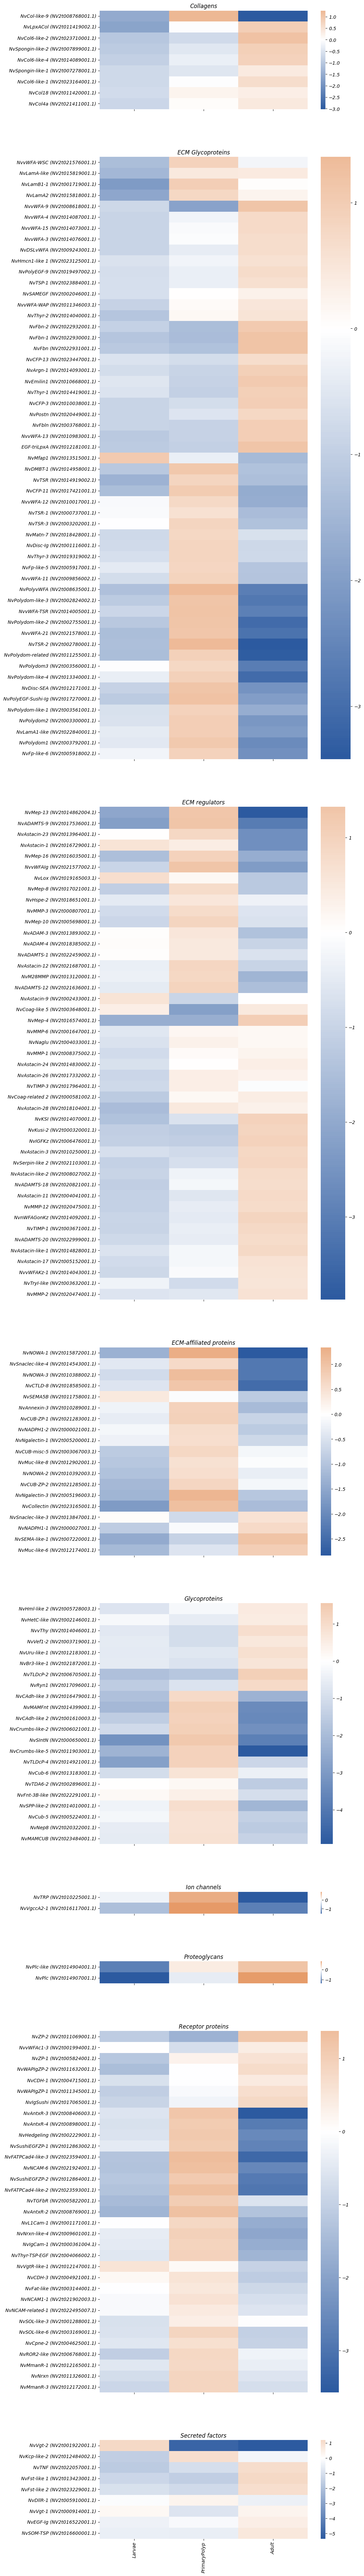

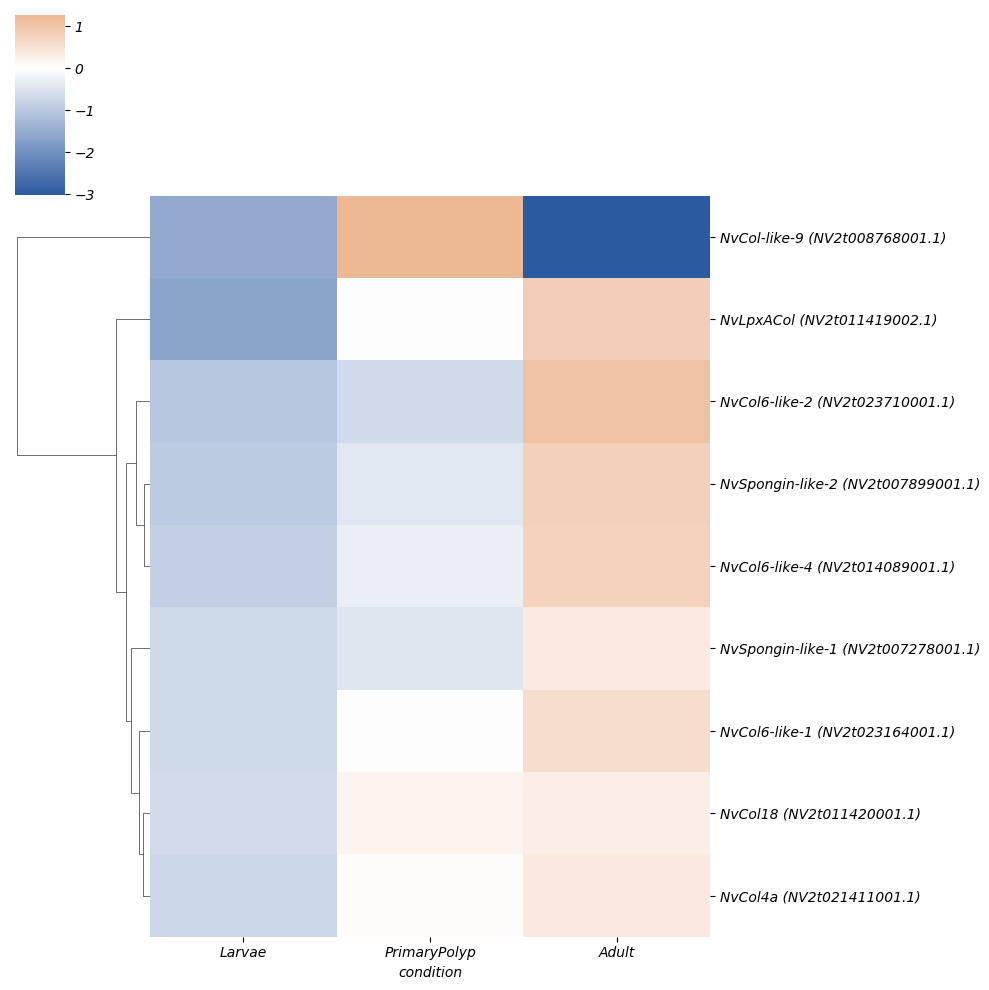

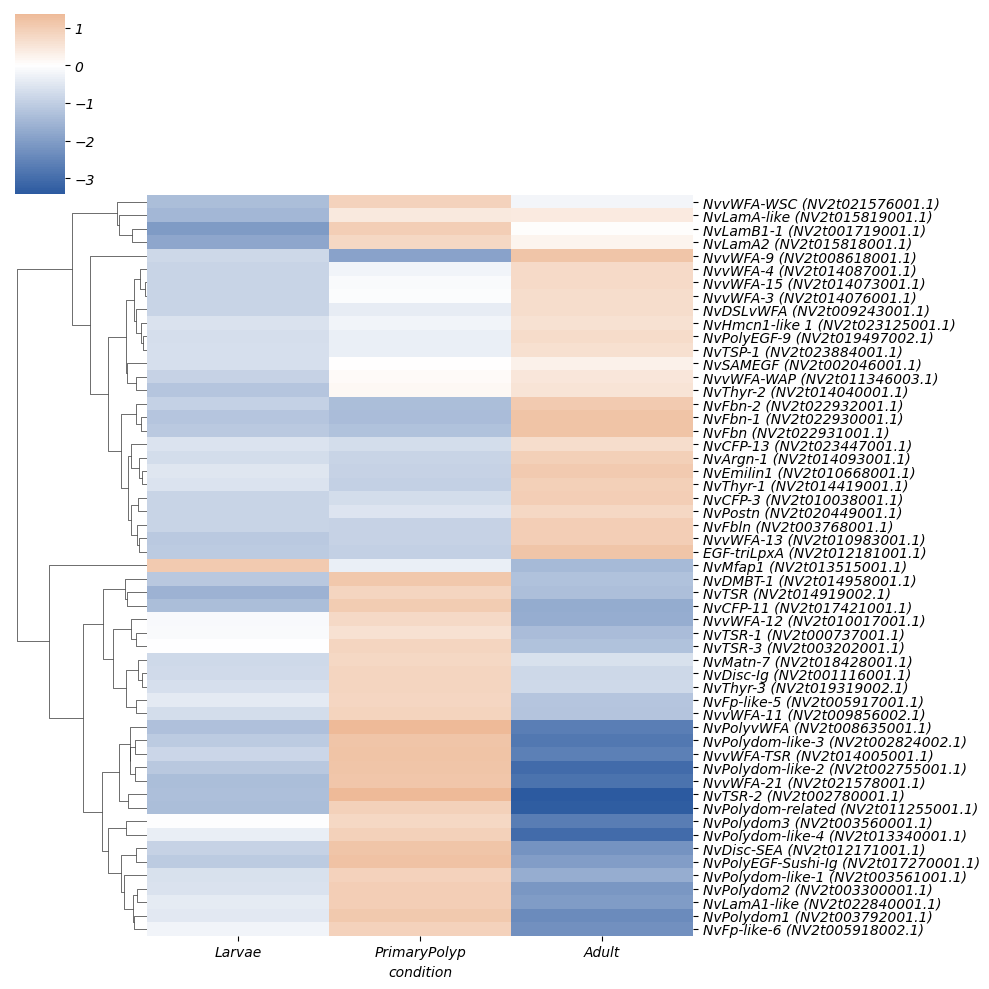

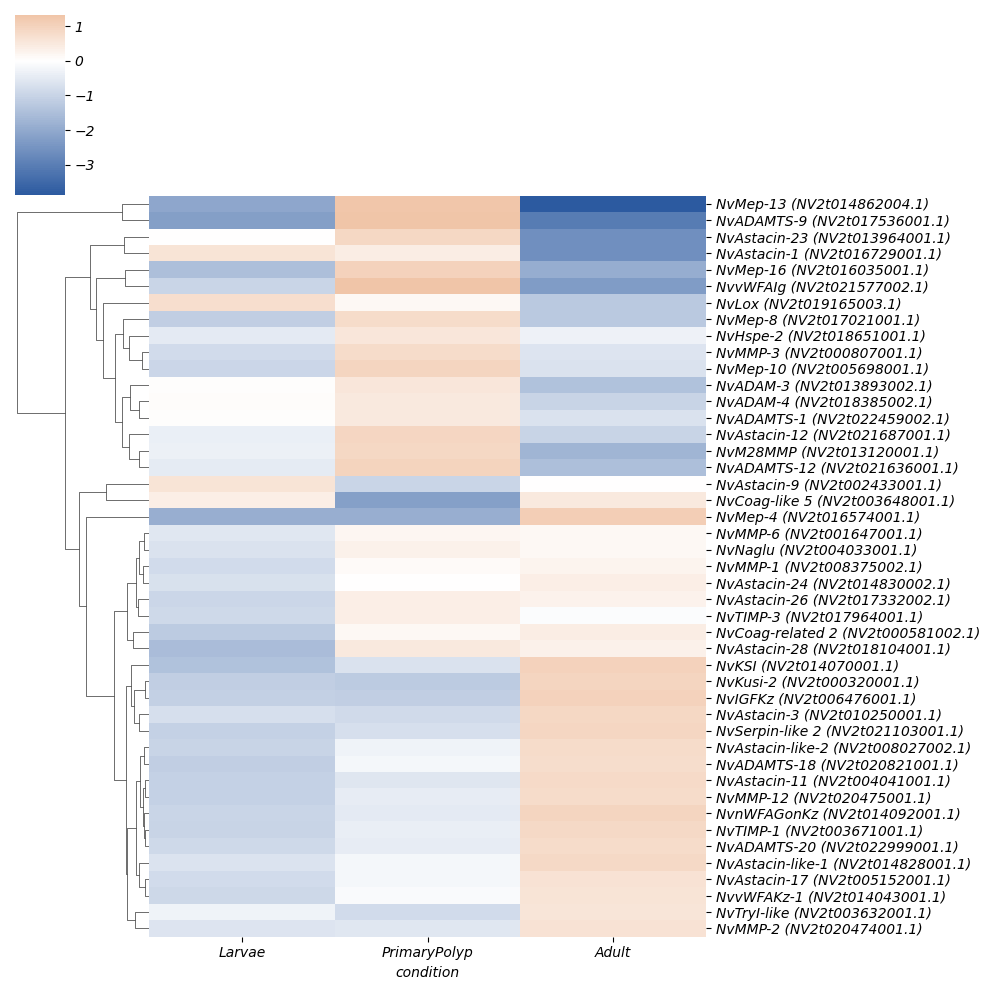

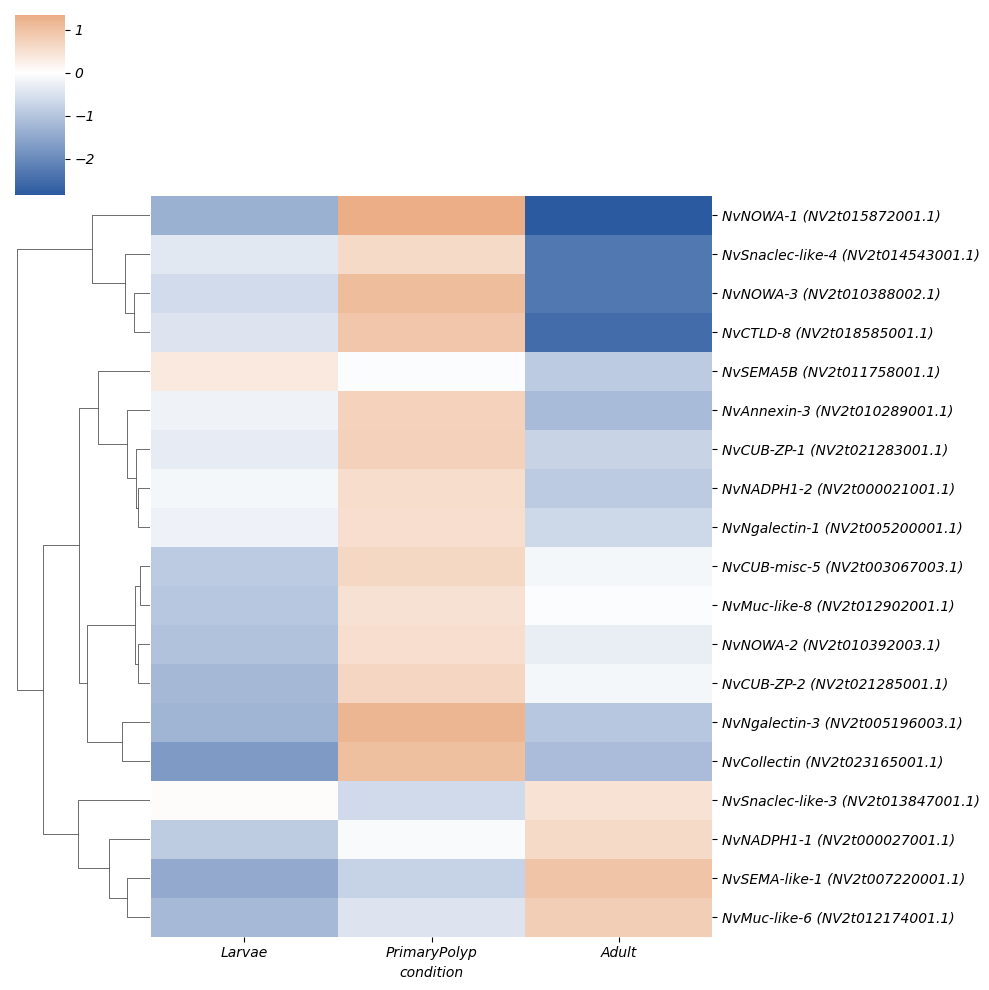

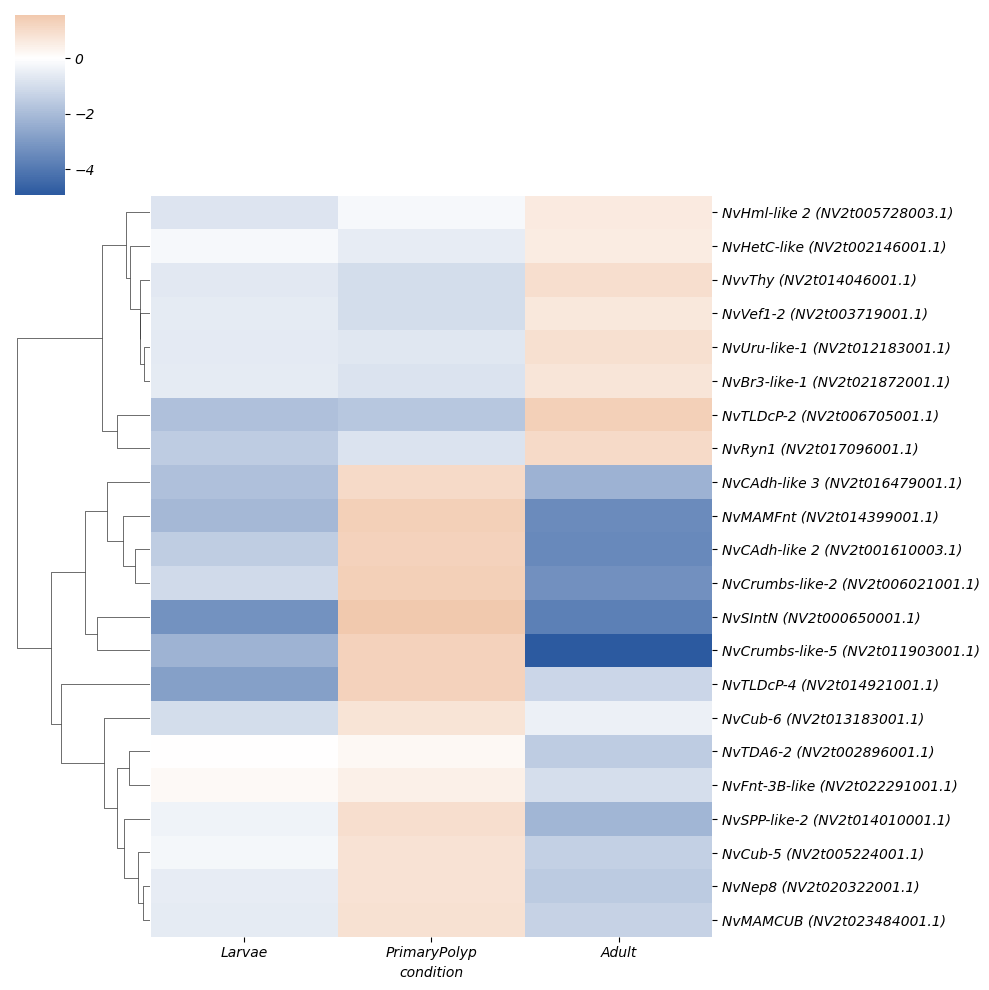

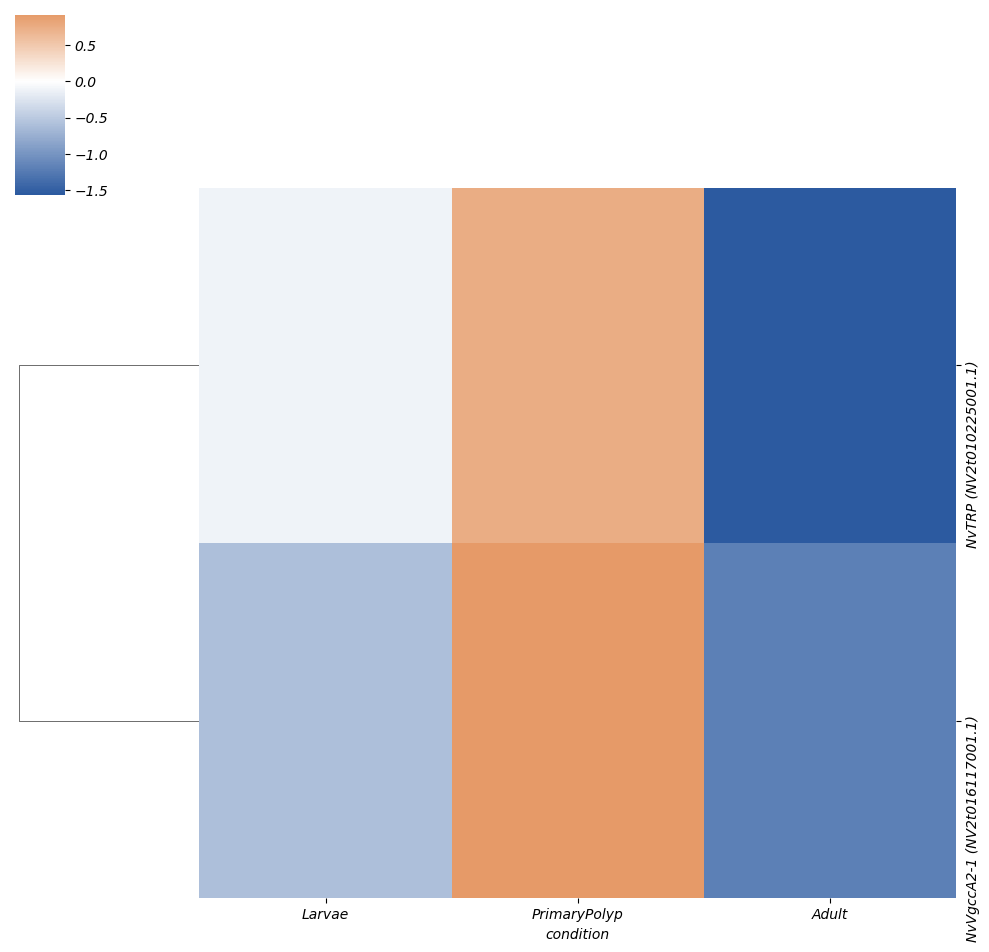

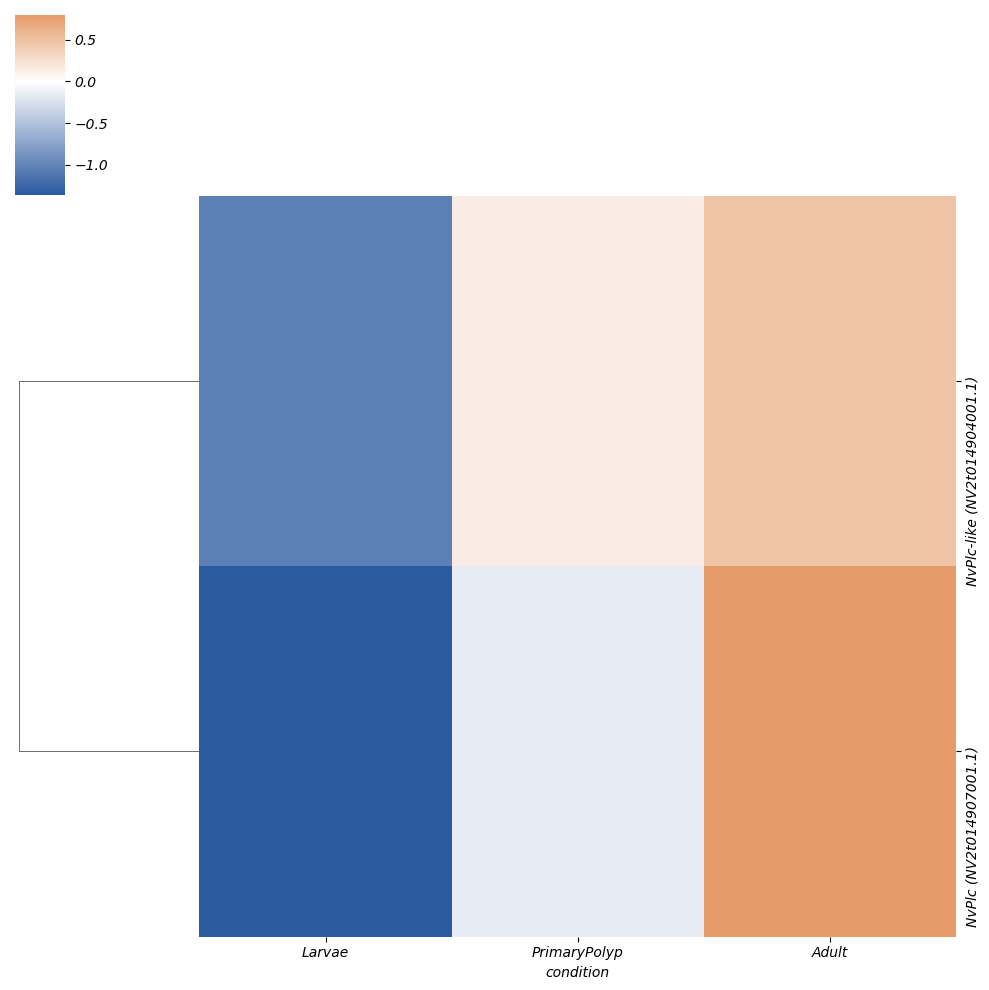

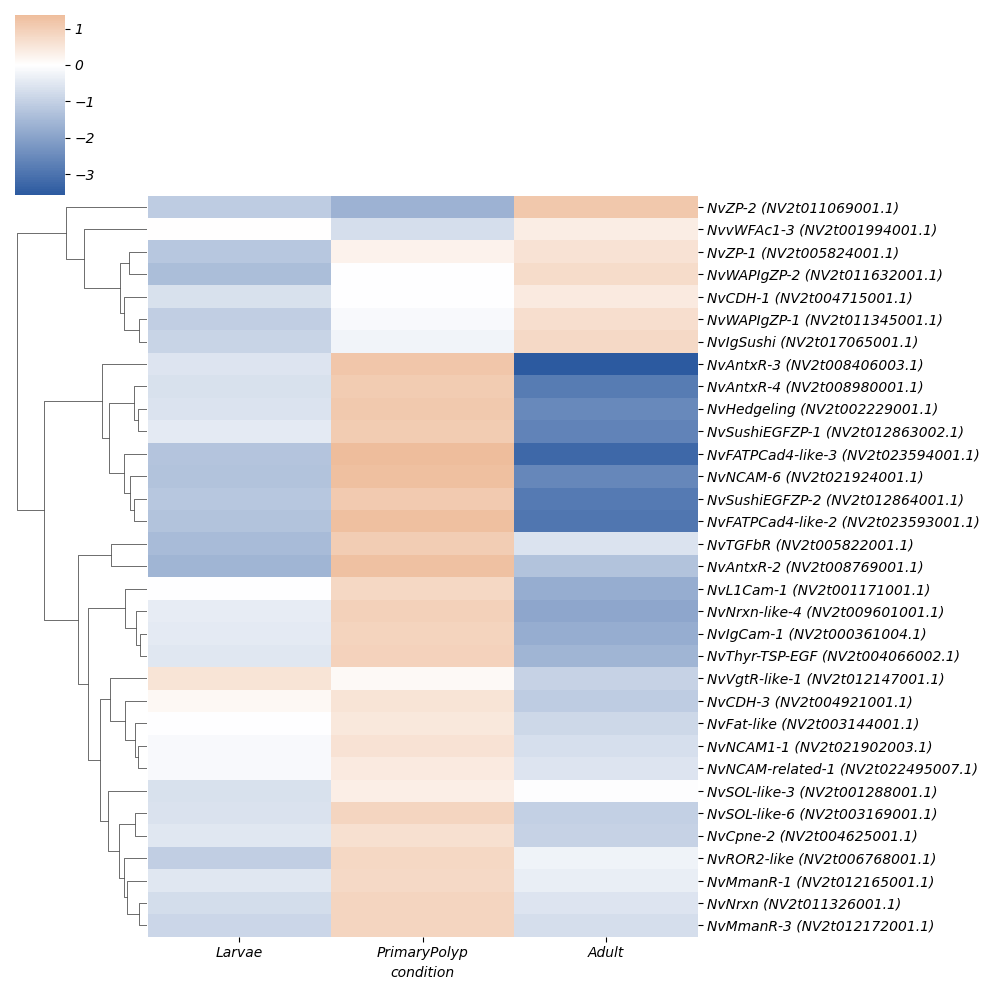

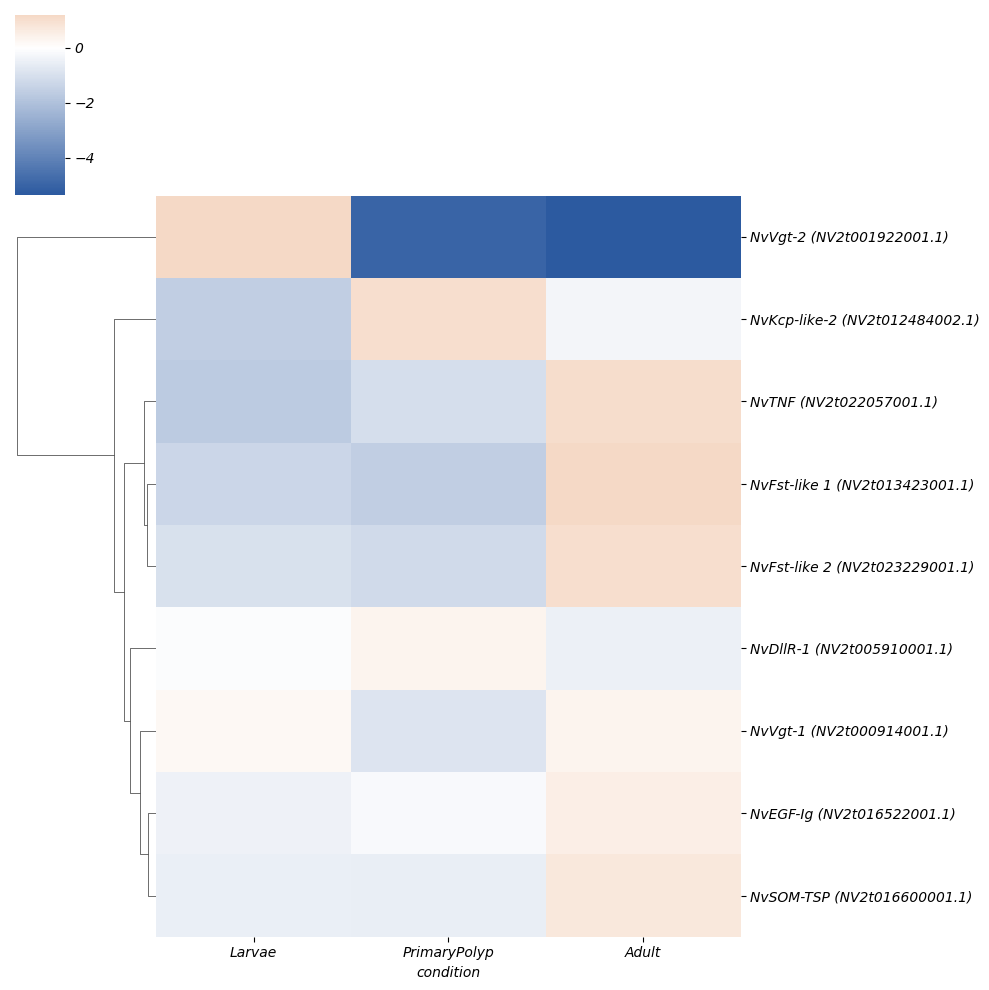

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Calculate global min and max values for color scale
global_min = np.log2(source["median.value"]).min().min()
global_max = np.log2(source["median.value"]).max().max()

# Define the hex colors for the start, middle, and end
colors = ["#2c5aa0", "#FFFFFF", "#d45500"]  # Blue, white, orange-red

# Create a custom colormap
color_map = LinearSegmentedColormap.from_list("custom_cmap", colors)

div_col = "Category manual"
clusters = source.groupby(div_col)

height_ratios = [len(table) for div, table in clusters]

fig, axes = plt.subplots(len(clusters), 1, figsize=(10, sum(height_ratios)*0.5), sharex=True, gridspec_kw={'height_ratios': height_ratios})

for i, (div, table) in enumerate(clusters):
    #if div not in ["Collagens","ECM Glycoproteins", "Proteoglycans"]:
    #    continue
    if len(table) > 1:  # Check if the group has more than one row
        clustermap = sns.clustermap(np.log2(table["median.value"]), col_cluster=False, cmap=color_map, yticklabels=True, center=0)
        heatmap_data = clustermap.data2d
        sns.heatmap(heatmap_data, cmap=color_map, xticklabels=True, annot=False, fmt=".2f", cbar=True,vmin=heatmap_data.min().min(), vmax=heatmap_data.max().max(),  ax=axes[i], square=True,center=0)
        axes[i].set_title(div)
        axes[i].set_xlabel("")
        axes[i].set_ylabel("")
    else:
        median_value_series = np.log2(table["median.value"])
        sns.heatmap(median_value_series, cmap="vlag", xticklabels=True, annot=False, fmt=".2f", cbar=True, ax=axes[i], square=True, center=0)
        axes[i].set_title(div)
        axes[i].set_xlabel("")
        axes[i].set_ylabel("")

    # Manually set the aspect ratio of the axes
    axes[i].set_aspect('auto')


fig.savefig("output/graphs/all_heatmaps.svg")
fig.show()

In [25]:
candidate_list.groupby("Category manual").size()

Category manual
Collagen                     1
Collagens                   43
ECM Glycoproteins          188
ECM regulators             139
ECM-affiliated proteins     78
Enzymes                      5
Glycoproteins               68
Ion channels                 6
Lectins                      2
Proteoglycans                9
Receptor proteins          197
Secreted factors            93
dtype: int64

In [26]:
candidate_list.groupby("Division manual").size()

Division manual
Core matrisome          241
Matrisome associated    310
Other                   278
dtype: int64

In [27]:
clusters.size()

Category manual
Collagens                   9
ECM Glycoproteins          55
ECM regulators             45
ECM-affiliated proteins    19
Glycoproteins              22
Ion channels                2
Proteoglycans               2
Receptor proteins          33
Secreted factors            9
dtype: int64